In [1]:
import pandas as pd
import matplotlib as plt
from soccerplots.radar_chart import Radar

In [2]:
#read chelsea dataset
df = pd.read_csv(r"C:\Users\Jonny\chelseaplayers.csv")
df.head()
#shows first 5 instances


,Player,Positon,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,Mason Mount,M,19,1253,7,5,2.80,5.08,4.18,0.36,0.30
1,Jorginho,M,18,1373,6,1,0.79,5.06,2.09,0.33,0.14
2,Romelu Lukaku,F,14,907,5,0,2.28,4.54,2.22,0.45,0.22
3,Reece James,D,16,1114,4,5,1.70,1.88,3.71,0.15,0.30
4,Ben Chilwell,D,6,540,3,1,2.17,1.30,0.83,0.22,0.14


In [3]:
#comparison
df= df[ (df['Player']=='Mason Mount')|(df['Player']=='Timo Werner')].reset_index()
df

,index,Player,Positon,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,0,Mason Mount,M,19,1253,7,5,2.80,5.08,4.18,0.36,0.30
1,11,Timo Werner,F,10,564,1,1,3.03,2.65,0.09,0.42,0.01


In [4]:
#Drop index and position from table as it should not be displayed in visual
df = df.drop(['index','Positon'],axis=1)
df


,Player,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,Mason Mount,19,1253,7,5,2.80,5.08,4.18,0.36,0.30
1,Timo Werner,10,564,1,1,3.03,2.65,0.09,0.42,0.01


In [5]:
#Use Paramaters to enusre correct columns are being used
params= list(df.columns)
params=params[1:]
params

['Apps', 'Min', 'Goals', 'Assists', 'sh90', 'xG', 'xA', 'xG90', 'xA90']

In [6]:
#Use lists with ranges for data to have a minimum and maximum range of data in the visual
ranges = []
a_values = []
b_values = []
for x in params:
    a = min(df[params][x])
    a = a -(a*.25)

    b = max(df[params][x])
    b = b +(b*.25)
    ranges.append((a,b))

for x in range(len(df['Player'])):
    if df['Player'][x]=='Mason Mount':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x]=='Timo Werner':
        b_values = df.iloc[x].values.tolist()

a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [7]:
#show data values 
values

[[19, 1253, 7, 5, 2.8, 5.08, 4.18, 0.36, 0.3],
 [10, 564, 1, 1, 3.03, 2.65, 0.09, 0.42, 0.01]]

In [8]:
#add title and colours for visuals
title = dict(
    title_name= 'Mason Mount',
    title_colour='blue',
    subtitle_name = 'Chelsea',
    subtitle_colour = 'blue',
    title_name_2= 'Timo Werner',
    title_colour_2='yellow',
    subtitle_name_2 = 'Chelsea',
    subtitle_colour_2 = 'yellow',
    title_fontsize = 18,
    subtitle_fontsize =15
)
endnote = 'Jonathan Crawford'

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


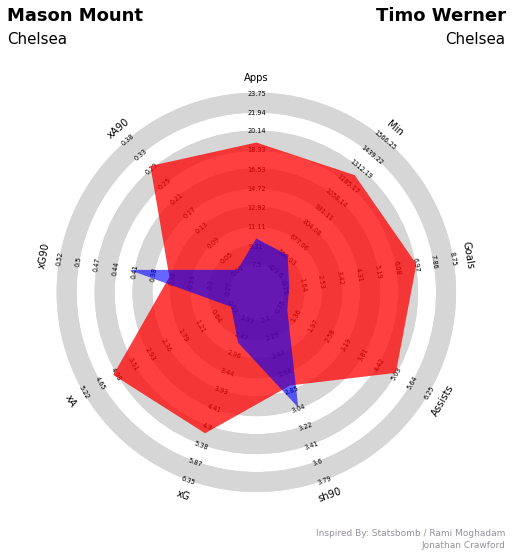

In [9]:
#create visula function using ranges, params and values
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                    radar_color=['red','blue'],
                    alphas=[.75,.6],title=title,endnote=endnote,
                    compare=True)

In [10]:
#comparison
df2= df[ (df['Player']=='Mason Mount')|(df['Player']=='Timo Werner')].reset_index()
df2

,index,Player,Apps,Min,Goals,Assists,sh90,xG,xA,xG90,xA90
0,0,Mason Mount,19,1253,7,5,2.80,5.08,4.18,0.36,0.30
1,1,Timo Werner,10,564,1,1,3.03,2.65,0.09,0.42,0.01
